## Certamen 1 - Taller de Inteligencia de Negocios<a href="#Certamen-1---Taller-de-Inteligencia-de-Negocios" class="anchor-link">¶</a>

### Universidad del Desarrollo Primer semestre lectivo año 2020

### Indicaciones<a href="#Indicaciones" class="anchor-link">¶</a>

-   Esta prueba consta de dos partes: Sección teórica que equivale al
    20% y una sección práctica que involucra el 80% de la evaluación.
-   Debe acompañar cada etapa del análisis de datos con comentarios
    escritos y explicativos del porque hace cada paso.
-   Cualquier indicio de copia será penalizado con la Nota Mínima.
-   Consultar fuentes de información públicas está permitido siempre
    cuando estas estén debidamente referenciadas.
-   El plazo de entrega es el sábado 02 Mayo a las 23:59 Horas a tráves
    de Canvas.
    -   Para la entrega del archivo, favor cambiar nombre dejando como
        nuevo nombre "Certamen 1 - Nombre Apellidos"
    -   Descargar archivo en formato HTML y subir a Canvas (Adjuntar una
        copia del documento en correo directo al profesor:
        joaquin.villagra@udd.cl )

### Datos del almumno o alumna<a href="#Datos-del-almumno-o-alumna" class="anchor-link">¶</a>

-   Nombre: Julián Zuñiga Errázuriz
-   RUN:19894037-2
-   Lenguaje escogido para la solución práctica: Python

### Parte 1: Análisis de datos<a href="#Parte-1:-Análisis-de-datos" class="anchor-link">¶</a>

De acuerdo a la tabla 1, descargue su conjunto de datos asignado y
genere un análisis de Inteligencia de Negocios acorde al contexto del
conjunto de datos. Recuerde las etapas vistas en clases:

-   Preprocesamiento de datos (Limpieza, tratamiento de registros nulos
    o faltantes, inconsistencias con tipos de datos, entre otros)
-   Análisis de estadística descriptiva
-   Método a aplicar según el dominio/contexto del problema

Tabla 1: Asignación de conjuntos de datos

<a href="#-Tabla-1:-Asignación-de-conjuntos-de-datos-" class="anchor-link">¶</a>

Nombre Alumn@

Dataset

Ubicación

ACUNA MOHR JAVIER  
ÁLVAREZ ZAMBRANO DIEGO  
BAEZA ROJAS GUSTAVO  
BALLERINI PÉREZ CLAUDIO  
BARRIOS DIAZ VICTOR  
CARVAJAL BARILE CRISTOBAL  
CONTRERAS LETELIER IGNACIO  
COURTIN MORALES SEBASTIÁN  
COVARRUBIAS QUINTANA FELIPE

Diabetes

[Diabetes Database
URL](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

DELGADO SERRA DANIELA  
FAIGUENBAUM GONZALEZ ARIEL  
FARIAS MOLINA JORGE  
GODOY ISSOTTA ADOLFO  
GONZALEZ ROJAS CRISTOBAL  
HARRIET DE SANTIAGO ISABEL  
IBÁÑEZ SAENZ JOSEFA  
LILLO GUTIERREZ CARLA  
MARCHESSI LAJEHANNIERE IGNACIO  
MENA ALAM FRANCISCA

Real Estate

[Real Estate Database
URL](https://www.kaggle.com/quantbruce/real-estate-price-prediction)

MUÑOZ PARADA PAVEL  
PAZ RODRÍGUEZ EUGENIO  
PINOCHET FUENZALIDA  
PRADO GAVILAN BENJAMIN  
ROJAS LAZO RICARDO  
RUBILAR LEIVA JOSEFINA  
SAN MARTÍN CORREA PÍA  
SCHURCH FERNANDEZ JOAQUIN  
SIERRA FUENTES DAVID  
SILVA RETAMAL JAVIER

Seguros

[Seguros Database URL](https://www.kaggle.com/mirichoi0218/insurance)

SILVA ROBLES VICENTE  
VALDEBENITO CÁRDENAS DIEGO  
VALDÉS SAAVEDRA FÉLIX  
VARGAS POBLETE FELIPE  
VÁSQUEZ APOLONIO JOSÉ  
VIDAL VERGARA IGNACIO  
VILLABLANCA TRUCCO SEBASTIÁN  
ZÚÑIGA ERRÁZURIZ JULIÁN

Nutrition

[Nutrition Database
URL](https://www.kaggle.com/spittman1248/cdc-data-nutrition-physical-activity-obesity)

In \[68\]:

    #Librerias que se utilizaran en el analisis
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    import statsmodels.api as

In \[69\]:

    # Utilizando pandas se lee el archivo excel el cual se guarda con el nombre de "seguro" en python
    seguro = pd.read_csv('insurance.csv')

In \[70\]:

    # Se analiza los primeros datos de la base de datos para ver que los nombres de las columnas esten bien colocados
    # y tener una idea de que información nos entrega.
    seguro.head()

Out\[70\]:

|     | age | sex    | bmi    | children | smoker | region    | charges     |
|-----|-----|--------|--------|----------|--------|-----------|-------------|
| 0   | 19  | female | 27.900 | 0        | yes    | southwest | 16884.92400 |
| 1   | 18  | male   | 33.770 | 1        | no     | southeast | 1725.55230  |
| 2   | 28  | male   | 33.000 | 3        | no     | southeast | 4449.46200  |
| 3   | 33  | male   | 22.705 | 0        | no     | northwest | 21984.47061 |
| 4   | 32  | male   | 28.880 | 0        | no     | northwest | 3866.85520  |

In \[77\]:

    #Al ver el tamaño del dataset se puede ver que consta de 1338 casos analizados y 7 columnas
    seguro.shape

Out\[77\]:

    (1338, 7)

In \[78\]:

    # Ver en que formato estan guardadas cada columna en este caso "sex", "smoker" y "region" son datos cualitativos
    # por lo tanto para fines practicos del analisis hay que cambiarlos a cuantitativos.
    #El resto de los datos se encuentran listos para el analisis
    seguro.dtypes

Out\[78\]:

    age           int64
    sex          object
    bmi         float64
    children      int64
    smoker       object
    region       object
    charges     float64
    dtype: object

In \[79\]:

    #Al agrupar por fumadores y no fumadores y usar la función describe() en la prima del seguro, 
    #hay 1064 no fumadores y 274 fumadores,se pude observar a grandes rasgos que en promedio una persona que fuma
    #significativamente mas que alguien que no fuma.
    seguro.groupby("smoker").charges.describe()

Out\[79\]:

|        | count  | mean         | std          | min        | 25%          | 50%         | 75%          | max         |
|--------|--------|--------------|--------------|------------|--------------|-------------|--------------|-------------|
| smoker |        |              |              |            |              |             |              |             |
| no     | 1064.0 | 8434.268298  | 5993.781819  | 1121.8739  | 3986.438700  | 7345.40530  | 11362.887050 | 36910.60803 |
| yes    | 274.0  | 32050.231832 | 11541.547176 | 12829.4551 | 20826.244213 | 34456.34845 | 41019.207275 | 63770.42801 |

In \[84\]:

    # El precio a pagar no varia significativamente segun cada región del pais.
    # El dataset contiene datos homogeneos de cada región del pais.
    seguro.groupby("region").charges.describe()

Out\[84\]:

|           | count | mean         | std          | min       | 25%         | 50%          | 75%        | max         |
|-----------|-------|--------------|--------------|-----------|-------------|--------------|------------|-------------|
| region    |       |              |              |           |             |              |            |             |
| northeast | 324.0 | 13406.384516 | 11255.803066 | 1694.7964 | 5194.322288 | 10057.652025 | 16687.3641 | 58571.07448 |
| northwest | 325.0 | 12417.575374 | 11072.276928 | 1621.3402 | 4719.736550 | 8965.795750  | 14711.7438 | 60021.39897 |
| southeast | 364.0 | 14735.411438 | 13971.098589 | 1121.8739 | 4440.886200 | 9294.131950  | 19526.2869 | 63770.42801 |
| southwest | 325.0 | 12346.937377 | 11557.179101 | 1241.5650 | 4751.070000 | 8798.593000  | 13462.5200 | 52590.82939 |

In \[96\]:

    #Haciendo un describe de la edad de las personas que se encuentran en el dataset
    #En media tienen 39 años la persona mas joven tiene 18 años la mayor 64 años.
    #25% de las personas son menores a 27 años.
    #50% de las personas tienen menos de 39 años.
    #75% de las personas tienen menos de 51 años.
    #La edad varia en 14 años.
    seguro.age.describe()

Out\[96\]:

    count    1338.000000
    mean       39.207025
    std        14.049960
    min        18.000000
    25%        27.000000
    50%        39.000000
    75%        51.000000
    max        64.000000
    Name: age, dtype: float64

In \[97\]:

    #Con esta función de pandas se puede transformar una columna de tipo cualitativa a cuantitativa. 
    seguro_var_num = pd.get_dummies(seguro, columns = ["sex","smoker","region"], drop_first = True)

In \[110\]:

    #Como se puede observar las  las columnas ahora adquieren valores cuantitativos.
    #hombre = 1, mujer = 0
    #Fumador = 1, No fumador = 0
    #Dependiendo de la columna de la región: si pertenece a esa región = 1, no pertenece = 0
    seguro_var_num.head()

Out\[110\]:

|     | age | bmi    | children | charges     | sex_male | smoker_yes | region_northwest | region_southeast | region_southwest |
|-----|-----|--------|----------|-------------|----------|------------|------------------|------------------|------------------|
| 0   | 19  | 27.900 | 0        | 16884.92400 | 0        | 1          | 0                | 0                | 1                |
| 1   | 18  | 33.770 | 1        | 1725.55230  | 1        | 0          | 0                | 1                | 0                |
| 2   | 28  | 33.000 | 3        | 4449.46200  | 1        | 0          | 0                | 1                | 0                |
| 3   | 33  | 22.705 | 0        | 21984.47061 | 1        | 0          | 1                | 0                | 0                |
| 4   | 32  | 28.880 | 0        | 3866.85520  | 1        | 0          | 1                | 0                | 0                |

In \[130\]:

    #Se analiza como se distribuyen los datos a excepcion de el genero, y si es fumador o no, ya que estos datos solo tomano dos
    #valores.
    #se pude apreciar que hay cuatro que tienen mayor relevancia es el indice de masa corporal y la prima.
    plt.rcParams['figure.figsize'] = (14, 10)
    plt.style.use('ggplot')
    seguro_var_num[["age","bmi", "children", "charges", "sex_male", "smoker_yes"]].hist()
    plt.show()

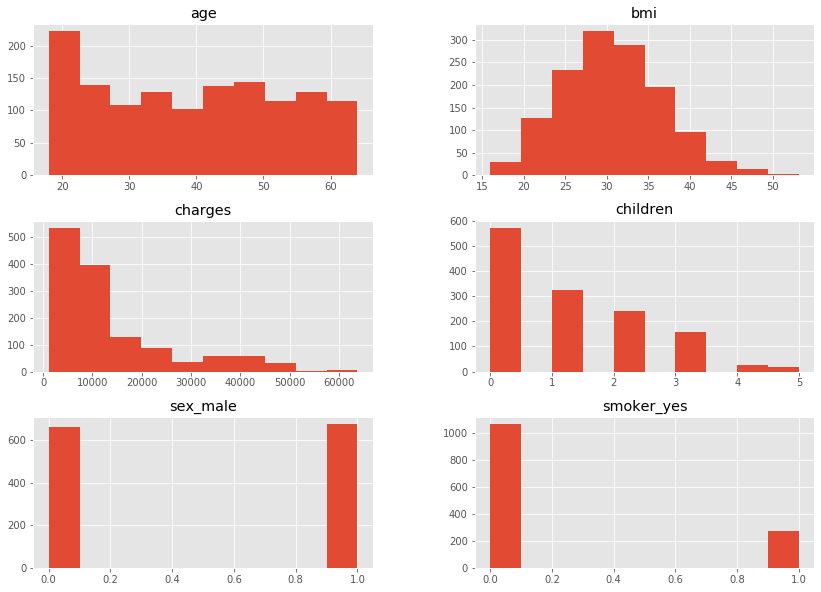

In \[137\]:

    #El indice de masa corporal tiene una distribución normal y es simetrica lo que significa que la media coincide con la mediana.
    sns.set(rc={'figure.figsize':(7,4)})
    sns.distplot(seguro[["bmi"]], bins=30)
    plt.show()

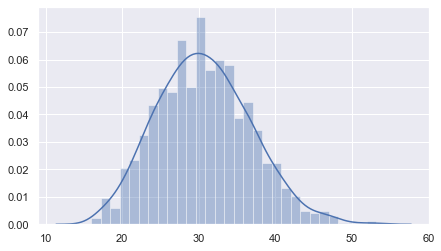

In \[149\]:

    #Aqui podemos combrobar lo anteriormente mencionado que el promedio de los datos de indice de masa corporal coincide con 
    #el 50%.
    seguro.bmi.describe()

Out\[149\]:

    count    1338.000000
    mean       30.663397
    std         6.098187
    min        15.960000
    25%        26.296250
    50%        30.400000
    75%        34.693750
    max        53.130000
    Name: bmi, dtype: float64

In \[145\]:

    #La prima tiene una asimetria positiva y que la densidad de datos se encuentran cargados hacia la izquierda.
    sns.set(rc={'figure.figsize':(7,4)})
    sns.distplot(seguro[["charges"]], bins=30)
    plt.show()

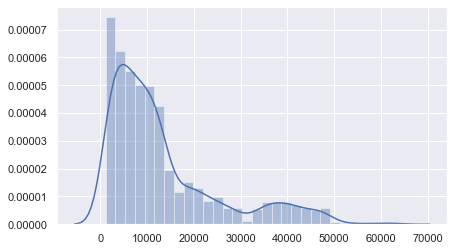

In \[150\]:

    #Se comprueba lo anteriormente mencionado ya que el promedio es considerablemente mayor a la mediana.
    seguro.charges.describe()

Out\[150\]:

    count     1338.000000
    mean     13270.422265
    std      12110.011237
    min       1121.873900
    25%       4740.287150
    50%       9382.033000
    75%      16639.912515
    max      63770.428010
    Name: charges, dtype: float64

In \[151\]:

    #Al ver la correlación se puede dar cuenta que exite una correlación proporcionalmente directa en relación a si se fuma
    #y el precio de la prima del seguro es decir si se fuma la prima subira considerablemtente su precio.
    #Existe tambien una correlación  menos significativa las cuales son de la edad y el bmi e relacion con el precio de la prima,
    #a medida que estas aumentan la prima tambien tiende a aumentar.
    tabla_correlacion = seguro_var_num.corr().round(2)
    tabla_correlacion
    sns.heatmap(data=tabla_correlacion, annot=True)

Out\[151\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x27560cccc48>

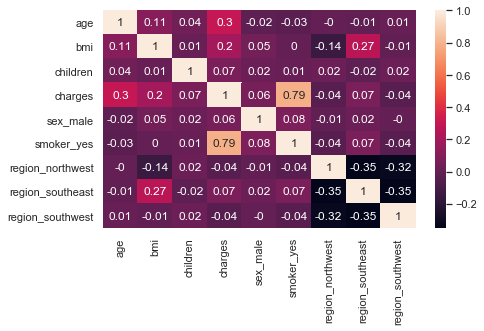

In \[158\]:

    #Al separar por grupos de fumadores y no fumadores se puede apreciar que se logra apreciar una gran diferencia,
    #y se puede apreciar un leve aumento en el precio de la prima al aumentar la edad y un aumento considerable si se cumple las
    #condiciones de ser fumador y a la vez tenr un indice de masa corporal alto.
    sns.pairplot(seguro, hue="smoker", markers=["o", "D"])

Out\[158\]:

    <seaborn.axisgrid.PairGrid at 0x27566bb1648>

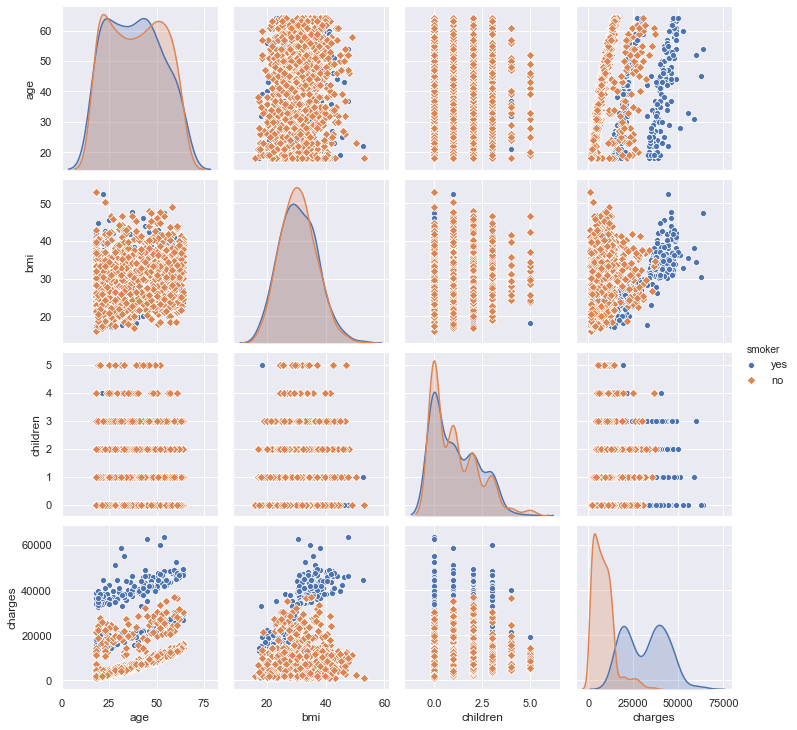

In \[153\]:

    #Al analizar los datos por región del pais se puede observar como tienen un comportamiento homogeneo, por lo tanto
    #no es relevante realizar un analisis mas profundo.
    sns.pairplot(seguro, hue="region")

Out\[153\]:

    <seaborn.axisgrid.PairGrid at 0x275625d1088>

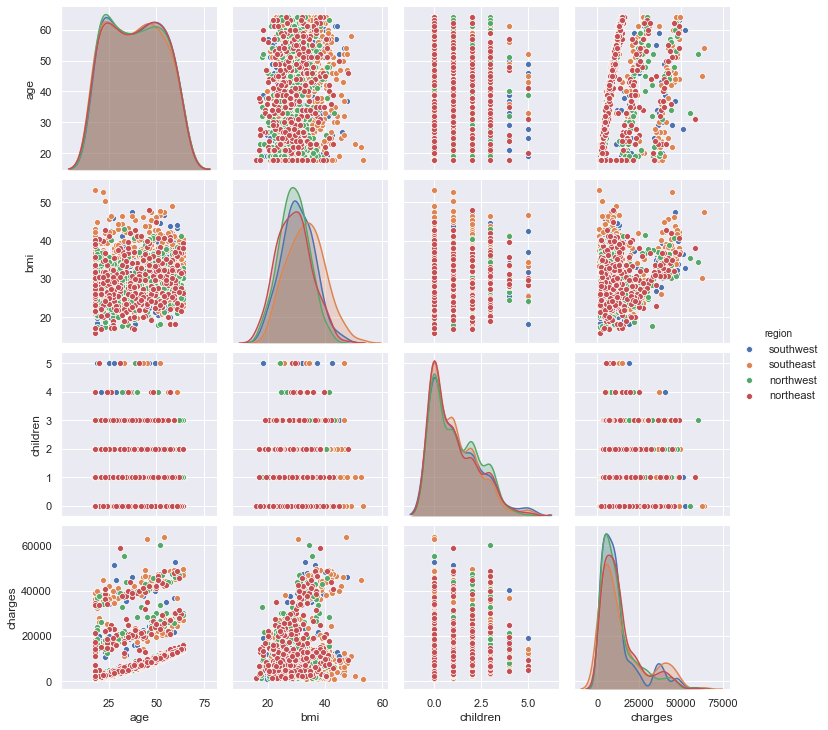

In \[159\]:

    #Al analizar la distribución de los datos por genero se puede apreciar que se mantiene bastante homogeneo por lo que
    #el genero no es un factor relevante en ninguna de las variables.
    sns.pairplot(seguro, hue="sex")

Out\[159\]:

    <seaborn.axisgrid.PairGrid at 0x27537534388>

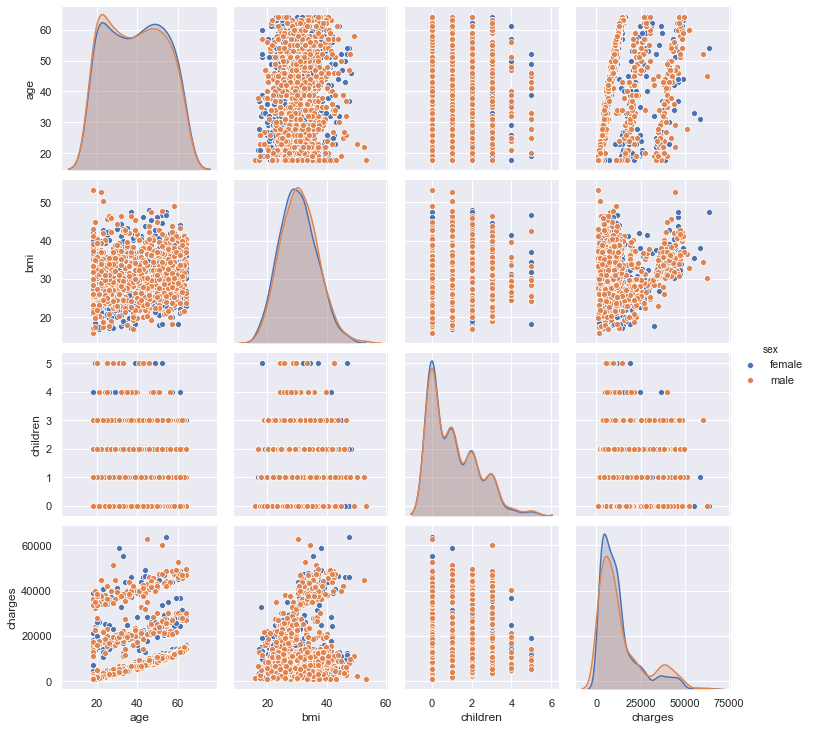

In \[160\]:

    #Al ir mas alla y realizar una regresión lineal para observar de mejor manera el comportamiento
    #con respecto a indice de masa corporal y el precio de la prima del seguro separado por casos de fumadores
    #y no fumadores.

    #Se puede comprobar que si se es fumador y a la vez se tiene un indice de masa corporal mayor la prima tiende a aumentar
    #considerablemente, sin embargo, si no es fumador y aumneta el indice de masa corporal el precio de la prima
    #no presenta un cambio considerable.

    sns.lmplot(x="bmi", y="charges", hue="smoker", data=seguro, markers=["p", "x"], palette="Set1")

Out\[160\]:

    <seaborn.axisgrid.FacetGrid at 0x275482bcbc8>

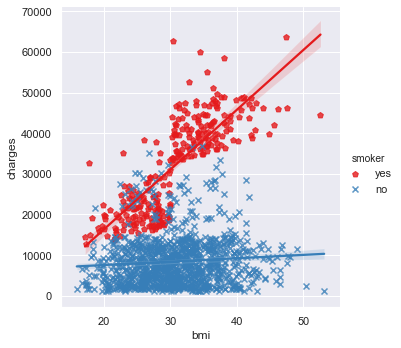

In \[155\]:

    #Al analizar la regresión lineal a medida que aumenta la edad respecto al precio de la prima y si es fumador o no,
    #se puede apreciar que independiente a si es fumador o no el precio tiende a aumentar a medida que la edad es mayor.

    #Y se puede apreciar una notable diferencia en los precios a pagar respecto a una persona de la misa edad que fuma
    #y otra que no lo hace, si fuma el precio a pagar es bastante mas alto al que no lo hace.
    sns.lmplot(x="age", y="charges", hue="smoker", data=seguro, markers=["p", "x"], palette="Set1")

Out\[155\]:

    <seaborn.axisgrid.FacetGrid at 0x27563fc61c8>

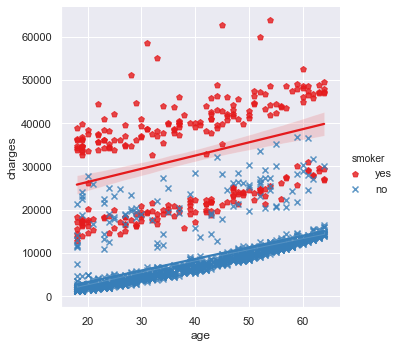

In \[175\]:

    #Ahora para analizar  una predicción de cual seria el preció a pagar, se eligen las variables que anteriormente,
    #son relevantes y afectan el valor de la primam, estos son la edad, si fuma o no y el indice de masa corporal.

    #Y al ver la significancia se puede ver que es 0, lo que significa que es una variable que si afecta el precio de la prima.
    X = pd.DataFrame(np.c_[seguro_var_num["age"],seguro_var_num['smoker_yes'], seguro_var_num["bmi"]], columns = ["age","smoker_yes","bmi"])
    Y = seguro_var_num['charges']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    x = X_train
    y = Y_train

    X2 = sm.add_constant(x)
    est = sm.OLS(y,X2)
    est2 = est.fit()
    print(est2.summary())

                                OLS Regression Results                            
    ==============================================================================
    Dep. Variable:                charges   R-squared:                       0.739
    Model:                            OLS   Adj. R-squared:                  0.738
    Method:                 Least Squares   F-statistic:                     1004.
    Date:                Sat, 02 May 2020   Prob (F-statistic):          5.17e-310
    Time:                        15:07:00   Log-Likelihood:                -10854.
    No. Observations:                1070   AIC:                         2.172e+04
    Df Residuals:                    1066   BIC:                         2.174e+04
    Df Model:                           3                                         
    Covariance Type:            nonrobust                                         
    ==============================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const      -1.154e+04   1060.316    -10.885      0.000   -1.36e+04   -9460.788
    age          260.0737     13.653     19.048      0.000     233.283     286.864
    smoker_yes  2.362e+04    467.622     50.513      0.000    2.27e+04    2.45e+04
    bmi          321.3907     31.038     10.355      0.000     260.488     382.294
    ==============================================================================
    Omnibus:                      224.330   Durbin-Watson:                   2.075
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.516
    Skew:                           1.187   Prob(JB):                    4.98e-102
    Kurtosis:                       5.198   Cond. No.                         291.
    ==============================================================================

    Warnings:
    [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In \[180\]:

    #Se realiza la ecuación de la regresion lineal multiple con la cual podemos predecir el precio de la prima.
    edad = 56
    # 1: Si es fumador ; 0: si no fuma
    fumador = 1
    bmi = 30
    e = 1060.316 + 13.653 + 467.622 + 31.038
    Prima = -11540 + 260.0737*edad + fumador*23620 + 321.3907*bmi + e
    print("$",round(Prima, 3))

    $ 37858.477

### Parte 2: Sección de preguntas teóricas<a href="#Parte-2:-Sección-de-preguntas-teóricas" class="anchor-link">¶</a>

-   Enuncie, utilizando sus palabras, qué es lo que reliza el método de
    las componentes principales. ¿En qué contextos resulta beneficioso?
    ¿Que aporta al análisis de datos/Inteligencia de Negocios?

    - El metodo de las componentes principales consiste en mover los ejes "X" y "Y" y colocarlos en el lugar en el cual los datos esten mas concentrados para asi disminuir la cantidad de variables y correlaciones a analizar para describir el comportamiento de los datos, aporta una mayor eficiencia a la hora de analizar datos que contengan muchas variables, consiguiendo disminuir el tiempo de trabajo.

-   El método de regresión lineal (considerando la variante simple y
    multivariada), ¿qué elementos considera? ¿Para que tipo de variable
    sirve realizar este análisis?

    - El metodo de la regresión lineal consiste en tomar los datos que tengan una mayor correlación estos serian los
    elementos a considerar, para asi pode colocar sobre los datos una recta que muestra la tendencia, esta ultima seria la  regresión lineal, esta sirve para variables del tipo continuas.

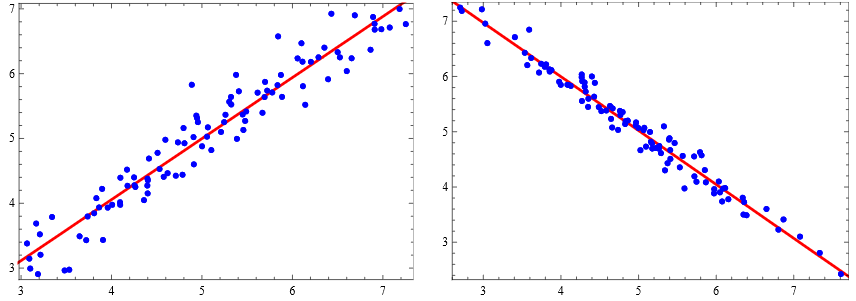

#### Referente a la Imagen anterior,<a href="#Referente-a-la-Imagen-anterior," class="anchor-link">¶</a>

-   ¿A qué tipo de correlación corresponde cada imagen?
-   ¿Cuál sería el valor aproximado del valor R cuadrado en las
    regresiones efectuadas? Favor, justifique su respuesta.

    - La imagen de la izquierda corresponde a una correlación positiva la cual es directamente proporcional, mientras 
    una variable aumenta la otra tambien aumenta, la imagen de la derecha representa una correlación negativa es decir es   inversamente proporcional, a medida que una variable aumenta la otra disminuye.

    - El R cuadrado de la imagen que se encuentra a la derecha es bastante alto, y es mayor que el de la imagen de la izquierda esto se debe a que los datos estan mas ajustados a la regresion lineal en la imagen de la derecha, en cambio la de la izquierza estan mas dispersos.

### Considere las siguientes regresiones lineales y responda las preguntas asociadas<a href="#Considere-las-siguientes-regresiones-lineales-y-responda-las-preguntas-asociadas" class="anchor-link">¶</a>

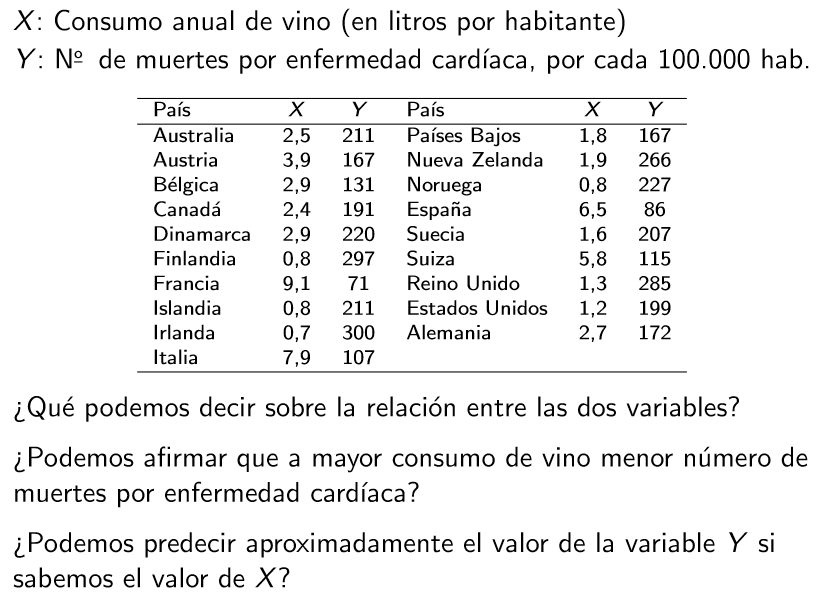

    - A simple vista se podria decir que existe una correlación negativa mientras aumenta el consumo de vino el numero de muertes por enfermedad cardiaca disminuye

    - Solo se podria realizar una suposición lo ideal para poder afirmar esta hipotesis es analizar los datos y realmente calcular la correlación entre estos datos y ser cautelosos con el valor entregado por la correlacón para afirmar el supuesto.

    - Si se afirmara que existe una correlación alta si se podria, teniendo en cuenta que hay que calcular la ecuación de la recta de la regresión lineal Y = mX + n conociendo m y n y sabiendo el valor de X se podria calcular el valor de Y

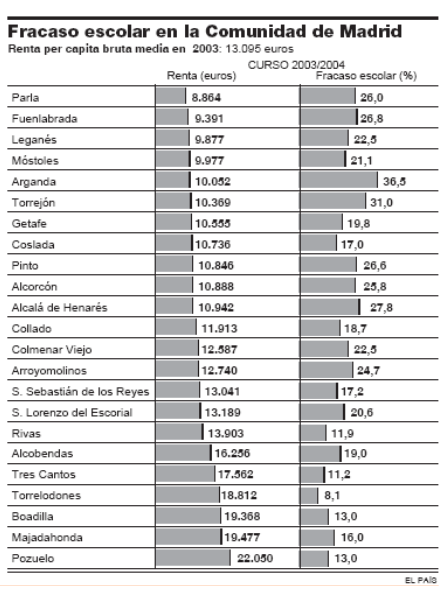

¿Existe relación entre la renta percibida por distrito y el % de fracaso
escolar?

<a href="#-¿Existe-relación-entre-la-renta-percibida-por-distrito-y-el-%-de-fracaso-escolar?-" class="anchor-link">¶</a>

    - Si existe una relación, se puede apreciar que a medida que la renta va en aumento el porcentaje de fracaso escolar va disminuyendo eso demuestra que existe una correlación negativa. Se pude concluir que en Madrid al tener una renta alta la posibilidad de fracaso es menor a que si se tuviera una renta baja.

-   Explique, con sus palabras, qué es un Outlier

    - Los outliers son datos que se alejan mucho al comportamiento que presentan la mayoria de los datos y producen ruido en el analisis ya que alteran el resultado de este, como es el caso de Torrejón donde el fracaso escolar sobresale demasiado incluso siendo mucho mayor que el fracaso escolar de Parla que es de los mas altos y incluso tienen una menor renta per capita bruta.

### Ya hemos llegado al final del certamen, ultima pregunta.<a href="#Ya-hemos-llegado-al-final-del-certamen,-ultima-pregunta." class="anchor-link">¶</a>

-   Favor comente la siguiente imagen en base a lo visto en clase,
    utilizando sus palabras. ¿Qué sucede con los datos de este gráfico?

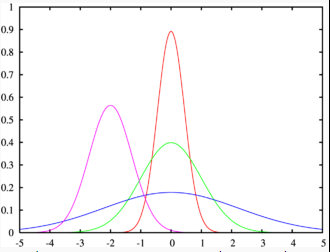

    - Se puede apreciar que se podrian diferenciar datos ya que distribuen de manera muy distinta y se podria deducir a cual corresponde con tan solo saber su ubicación en el grafico es decir los valores en las componentes.

-   Bibliografia\\
    -"<https://seaborn.pydata.org/generated/seaborn.pairplot.html>" \\
    -"<https://ligdigonzalez.com/cambiando-variables-categorias-por-variables-numericas-con-python>"
    \\
-   Archivos Python presentados en clases por Joaquin Villagra.

In \[ \]: